# Imports and constants

In [475]:
#import statemets

import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
import matplotlib.pyplot as plt
from customScripts import utilities as util
from customScripts import features as feat

In [476]:
# parameters

#number of samples / second
sampling_rate = 48000

#length of frame in samples
frame_length = 6000 #48000

#number of samples used as offset for earch consecutive frame
hop_length = 3000 #24000

#number of mel frequency bins to use
bin_number = 80 #80

#set the desired number of frames / second here
ground_thruth_conversion_const = 16 #2

#input data
file_paths = ['audio_files/Muppets-02-01-01.wav', 'audio_files/Muppets-02-04-04.wav', 'audio_files/Muppets-03-04-03.wav']
grount_truth_paths = ['ground_truth/Muppets-02-01-01.csv', 'ground_truth/Muppets-02-04-04.csv', 'ground_truth/Muppets-03-04-03.csv']
prediction_paths = ['predictions/Muppets-02-01-01.csv', 'predictions/Muppets-02-04-04.csv', 'predictions/Muppets-03-04-03.csv']
file_lengths = [1547, 1548, 1539] #in seconds

# File loading and feature extraction

In [477]:
#load episode 1
y_1 = util.load_audio(file_paths[0], sampling_rate)

In [478]:
#load episode 2
y_2 = util.load_audio(file_paths[1], sampling_rate)

In [479]:
#load episode 3
y_3 = util.load_audio(file_paths[2], sampling_rate)

In [480]:
#compute spectrogram for episode 1
spectrogram_1 = feat.compute_spectrogram(y_1, frame_length, hop_length, bin_number)
spectrogram_1T = spectrogram_1.transpose()
print('frame number:',len(spectrogram_1T))

frame number: 24757


In [481]:
#compute spectrogram for episode 2
spectrogram_2 = feat.compute_spectrogram(y_2, frame_length, hop_length, bin_number)
spectrogram_2T = spectrogram_2.transpose()
print('frame number:',len(spectrogram_2T))

frame number: 24773


In [482]:
#compute spectrogram for episode 3
spectrogram_3 = feat.compute_spectrogram(y_3, frame_length, hop_length, bin_number)
spectrogram_3T = spectrogram_3.transpose()
print('frame number:',len(spectrogram_3T))

frame number: 24640


In [483]:
#load ground truth, pad it with zeroes and adjust to frame number

#episode 1
gt_1 = util.load_ground_truth(grount_truth_paths[0], '/n')
gt_1 = util.compute_0_padded_gt(gt_1, file_lengths[0])
gt_1 = util.adjust_gt_to_frames(gt_1, ground_thruth_conversion_const)
# append zeros so that lenght equals the frames list length
for i in range(len(spectrogram_1T) - len(gt_1)):
    gt_1.append(0)
print('ground truth size:',len(gt_1))

#episode 2
gt_2 = util.load_ground_truth(grount_truth_paths[1], '/n')
gt_2 = util.compute_0_padded_gt(gt_2, file_lengths[1])
gt_2 = util.adjust_gt_to_frames(gt_2, ground_thruth_conversion_const)
# append zeros so that lenght equals the frames list length
for i in range(len(spectrogram_2T) - len(gt_2)):
    gt_2.append(0)
print('ground truth size:',len(gt_2))

#episode 3
gt_3 = util.load_ground_truth(grount_truth_paths[2], '/n')
gt_3 = util.compute_0_padded_gt(gt_3, file_lengths[2])
gt_3 = util.adjust_gt_to_frames(gt_3, ground_thruth_conversion_const)
# append zeros so that lenght equals the frames list length
for i in range(len(spectrogram_3T) - len(gt_3)):
    gt_3.append(0)
print('ground truth size:',len(gt_3))

ground truth size: 24757
ground truth size: 24773
ground truth size: 24640


In [484]:
#concatenate training data

gt_train = gt_1 + gt_2

spectrogram_train = np.concatenate((spectrogram_1T, spectrogram_2T), axis=0)

spectrogram_predict = spectrogram_3T

#spectrogram_train[3195] == spectrogram_2T[100]

#for i,g in enumerate(gt_train):
#    if g == 1:
#        print(i)

# Classifier training and prediction

In [485]:
# use a Multi-layer Perceptron classifier with default parameters
clf = MLPClassifier()

In [486]:
clf.fit(spectrogram_train, gt_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [487]:
prediction = clf.predict(spectrogram_predict)

In [488]:
np.savetxt(prediction_paths[2], prediction, delimiter="/n")

# Evaluation

In [489]:
print('precision (micro average):',precision_score(gt_3, prediction, average='micro'))
print('precision (macro average):',precision_score(gt_3, prediction, average='macro'))
print('precision (weighted average):',precision_score(gt_3, prediction, average='weighted'))

precision (micro average): 0.7115665584415585
precision (macro average): 0.5491344342811632
precision (weighted average): 0.6390190567390244


In [490]:
print('recall (micro average):',recall_score(gt_3, prediction, average='micro'))
print('recall (macro average):',recall_score(gt_3, prediction, average='macro'))
print('recall (weighted average):',recall_score(gt_3, prediction, average='weighted'))

recall (micro average): 0.7115665584415585
recall (macro average): 0.517993875458666
recall (weighted average): 0.7115665584415585


In [491]:
print('f1 (micro average):',f1_score(gt_3, prediction, average='micro'))
print('f1 (macro average):',f1_score(gt_3, prediction, average='macro'))
print('f1 (weighted average):',f1_score(gt_3, prediction, average='weighted'))

f1 (micro average): 0.7115665584415584
f1 (macro average): 0.4934335949992906
f1 (weighted average): 0.6488477664913387


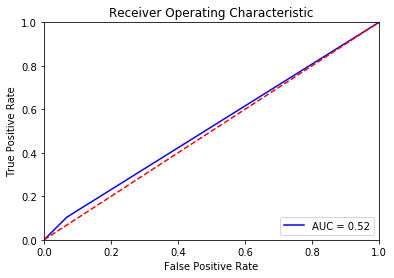

In [492]:
# calculate false positive / true positive rate and area under curve
fpr, tpr, threshold = roc_curve(gt_3, prediction)
roc_auc = auc(fpr, tpr)

# plot ROC curve
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
